**Importing Dependencies**


We shall start by importing all the neccessary libraries.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import re

2023-01-23 11:00:05.547033: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amirzar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
tweet_data = pd.read_csv('Labled_tweets.csv', names=['sentiment', 'id', 'date', 'query', 'user_id', 'text'],encoding="ISO-8859-1") #shuffles the data
tweet_data

,sentiment,id,date,query,user_id,text
1096384,4,1970309098,Sat May 30 03:19:43 PDT 2009,NO_QUERY,joannetoh,gg to Adidas Sundown Marathon now!
144957,0,1882094675,Fri May 22 06:13:12 PDT 2009,NO_QUERY,CranberryBlue,Last day.... and !!!!!!
322910,0,2004736060,Tue Jun 02 08:39:46 PDT 2009,NO_QUERY,lisadawnjoy,sitting at a computer during my 3rd period spa...
446807,0,2068525298,Sun Jun 07 14:13:53 PDT 2009,NO_QUERY,MiDesfileNegro,@WOAHAmber If I could afford international rat...
174990,0,1964703792,Fri May 29 14:39:59 PDT 2009,NO_QUERY,Sims_Galore,awww Lukes been evicted from the Quiz
...,...,...,...,...,...,...
151635,0,1932559816,Tue May 26 21:43:06 PDT 2009,NO_QUERY,kimravia,@Rove1974 aww poor lizard be careful it might...
1214517,4,1989453849,Mon Jun 01 01:36:01 PDT 2009,NO_QUERY,TYTWATTER,Bring on the tequila
708162,0,2257219460,Sat Jun 20 13:59:31 PDT 2009,NO_QUERY,trobinson82,Ew...starbucks you continue to disappoint
35240,0,1565128347,Mon Apr 20 05:58:37 PDT 2009,NO_QUERY,HellOfABlackHat,My buddy list is toast.


In [43]:
## we only need two columns for sentiment anlysis
tweet_text = tweet_data[['text','sentiment']]
tweet_text

,text,sentiment
1096384,gg to Adidas Sundown Marathon now!,4
144957,Last day.... and !!!!!!,0
322910,sitting at a computer during my 3rd period spa...,0
446807,@WOAHAmber If I could afford international rat...,0
174990,awww Lukes been evicted from the Quiz,0
...,...,...
151635,@Rove1974 aww poor lizard be careful it might...,0
1214517,Bring on the tequila,4
708162,Ew...starbucks you continue to disappoint,0
35240,My buddy list is toast.,0


In [47]:
## change the categories to their real name 
tweet_text["sentiment"].replace(0,"negative",inplace=True)
tweet_text["sentiment"].replace(4,"positive",inplace=True)
tweet_text["sentiment"]


/var/folders/gy/scg9c9b176sck8t_0rgv5qj80000gn/T/ipykernel_39178/518287087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_text["sentiment"].replace(0,"negative",inplace=True)
/var/folders/gy/scg9c9b176sck8t_0rgv5qj80000gn/T/ipykernel_39178/518287087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_text["sentiment"].replace(4,"positive",inplace=True)


1096384    positive
144957     negative
322910     negative
446807     negative
174990     negative
             ...   
151635     negative
1214517    positive
708162     negative
35240      negative
443745     negative
Name: sentiment, Length: 320000, dtype: object

Text(0.5, 1.0, 'Dataset labels distribuition')

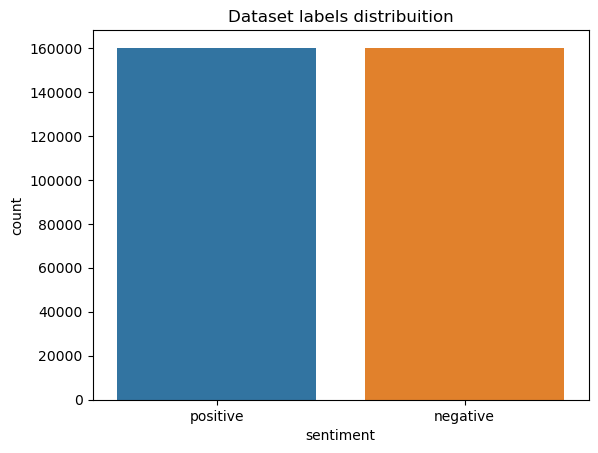

In [49]:
sns.countplot(x="sentiment",data = tweet_text)
plt.title("Dataset labels distribuition")

In the next step we should Pre-Process the text of the tweets!

In [50]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

def preprocess(text, stem=False):
    # Remove link,user and special characters
    # TEXT CLENAING
    TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)


In [51]:
tweet_text.text = tweet_text.text.apply(lambda x: preprocess(x))


/var/folders/gy/scg9c9b176sck8t_0rgv5qj80000gn/T/ipykernel_39178/1619682434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_text.text = tweet_text.text.apply(lambda x: preprocess(x))


In [52]:
tweet_text["text"]


1096384                           gg adidas sundown marathon
144957                                              last day
322910     sitting computer 3rd period spare kinda bored ...
446807     could afford international rates could hear ac...
174990                               awww lukes evicted quiz
                                 ...                        
151635     aww poor lizard careful might eat next time ro...
1214517                                        bring tequila
708162                      ew starbucks continue disappoint
35240                                       buddy list toast
443745     dyed hair like blacky red love may dye soon ty...
Name: text, Length: 320000, dtype: object

In [55]:
## The volume of our data is so huge and training this amount of data requires lots of memory and time so we sample our data( but for better precision we can always feed the model with our entire dataset)
sample_negative = tweet_text[tweet_text["sentiment"] == "negative" ][0:10000]
sample_positive = tweet_text[tweet_text["sentiment"] == "positive"][0:10000]

## combine those two sample to create a single dataframe
sample_tweet = pd.concat([sample_negative, sample_positive], axis=0)
sample_tweet["sentiment"].value_counts()

## Now we can shuffle our data 
sample_tweet.sample(frac=1)


,text,sentiment
263307,hope dont think creep dream last night best fr...,negative
786805,never managed get work without repaying,negative
530404,need blinn really frustrated aggressive last w...,negative
639720,hugs actually wanna meet bad,negative
176501,another david hughes list hurt davidahughes ftw,negative
...,...,...
391786,saturday go work,negative
1473691,tired gonna donuts breakfast,positive
506588,top ten tournament go distance though,negative
1089191,ouch well get well soon,positive


In [56]:
## for starting the learning process we should vectorize the text of tweets with TFIDF we will do that.
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(sample_tweet['text'])

TfidfVectorizer()

In [57]:
X = vectorizer.transform(sample_tweet['text'])

In [58]:
## The algorithm only understand digit so we should encode our target which is "Negative" and "Positive"
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(sample_tweet['sentiment'])


In [59]:
le.classes_

array(['negative', 'positive'], dtype=object)

In [60]:
## Lets check the size of input and output!
import numpy as np
print(np.shape(X))
print(np.shape(y))


(20000, 21418)
(20000,)


In [61]:
## Now we should split our data into train and test:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)


In [62]:
## Now we can create our SVC model 
from sklearn import svm
model = svm.SVC(C=1, kernel='linear', random_state=2023 ,probability=True)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear', probability=True, random_state=2023)

In [63]:
## Let's check for the precision of our model :
model.score(X_test, y_test)


0.728

We can plot the confusion matrix as well to see where exactly our model is trained well or not.

In [64]:
## following function help us to visualize our confusion matrix

import itertools
from sklearn.metrics import classification_report, confusion_matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)


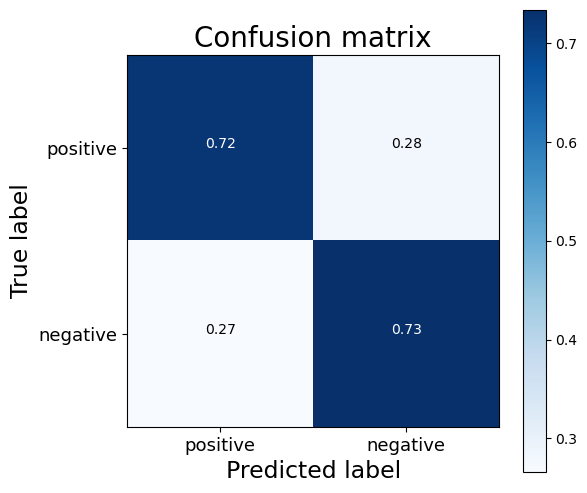

In [65]:
y_pred = model.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
plot_confusion_matrix(
    cnf_matrix, classes=tweet_text.sentiment.unique(), title="Confusion matrix")
plt.show()


Another important measurements that can help us to evaluate our model is the classification report. let's print that as well.

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      2507
           1       0.72      0.73      0.73      2493

    accuracy                           0.73      5000
   macro avg       0.73      0.73      0.73      5000
weighted avg       0.73      0.73      0.73      5000



We create our svc model with probability so now let's check what was the probability of each tweet(on tested) on being whether positive or negative!

In [68]:
probability_results = model.predict_proba(X_test)
prob_df = pd.DataFrame(probability_results)
prediction_df = pd.DataFrame(y_pred)

In [69]:
result_test = pd.concat([prob_df ,prediction_df],axis=1)
result_test.columns = ["negative_prob","postitve_prob","predicted"]
result_test["predicted"].replace(0,"negative",inplace=True)
result_test["predicted"].replace(1,"possitive",inplace=True)
result_test

,negative_prob,postitve_prob,predicted
0,0.482337,0.517663,possitive
1,0.904190,0.095810,negative
2,0.524112,0.475888,negative
3,0.347095,0.652905,possitive
4,0.869053,0.130947,negative
...,...,...,...
4995,0.825918,0.174082,negative
4996,0.338079,0.661921,possitive
4997,0.756333,0.243667,negative
4998,0.197734,0.802266,possitive


As we know each Machine learning algorithm consists of many parameters and we can improve performance by choosing the best params so in the following block of code we will try to use Gridsearch to find the best parameters for our model. We should be aware that this process can be so time consuming because of different possibilities for our parameters so we only check some limited parameters in the following.

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params = {
    'C': [1,5,10],
    'kernel': ['linear','rbf'],
    'gamma': ['auto', 0.1]
}
gsh = GridSearchCV(SVC(), param_grid=params, scoring='accuracy', cv=2, n_jobs=-1, verbose=10)

gsh.fit(X, y)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2; 1/12] START C=1, gamma=auto, kernel=linear.............................
[CV 2/2; 1/12] START C=1, gamma=auto, kernel=linear.............................
[CV 1/2; 2/12] START C=1, gamma=auto, kernel=rbf................................
[CV 2/2; 2/12] START C=1, gamma=auto, kernel=rbf................................
[CV 1/2; 1/12] END C=1, gamma=auto, kernel=linear;, score=0.718 total time=  27.1s
[CV 2/2; 1/12] END C=1, gamma=auto, kernel=linear;, score=0.717 total time=  27.2s
[CV 1/2; 3/12] START C=1, gamma=0.1, kernel=linear..............................
[CV 2/2; 3/12] START C=1, gamma=0.1, kernel=linear..............................
[CV 2/2; 2/12] END .C=1, gamma=auto, kernel=rbf;, score=0.590 total time=  38.1s
[CV 1/2; 2/12] END .C=1, gamma=auto, kernel=rbf;, score=0.694 total time=  38.3s
[CV 1/2; 4/12] START C=1, gamma=0.1, kernel=rbf.................................
[CV 2/2; 4/12] START C=1, gamma=0.1, kernel=

GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5, 10], 'gamma': ['auto', 0.1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=10)

In [76]:
## now lets see what was the params
gsh.best_estimator_

SVC(C=1, gamma=0.1)

In the End we save our model so we can use it later.

In [71]:
import pickle 

with open("svc_20000_sample.sentiment","wb") as f:
    pickle.dump(model,f)


Anytime we want to use our model we can use this line of code and reload it.

In [31]:
model_svm = pickle.load(open("svc_80000_sample.sentiment","rb"))